<a href="https://colab.research.google.com/github/SANJAYV10/Plant_disease_classifier/blob/main/Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 ! pip install -q kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d arjuntejaswi/plant-village

100% 328M/329M [00:11<00:00, 30.9MB/s]
100% 329M/329M [00:11<00:00, 30.9MB/s]


In [6]:
! mkdir potato

In [7]:
! unzip plant-village.zip -d potato

Streaming output truncated to the last 5000 lines.
  inflating: potato/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08c033bd-fbc3-445a-88d1-1863070e52ce___YLCV_GCREC 2872.JPG  
  inflating: potato/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08dd176c-e9d9-4746-92c3-fa8dc9074347___UF.GRC_YLCV_Lab 03057.JPG  
  inflating: potato/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08f78a80-46f5-45a6-937c-4d05d61c08c2___UF.GRC_YLCV_Lab 01895.JPG  
  inflating: potato/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0903aa95-6e8a-4abd-a003-126fcd9a5493___YLCV_GCREC 2806.JPG  
  inflating: potato/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0911d416-d73d-4c2a-8e45-207a7ceb7c9a___YLCV_GCREC 2773.JPG  
  inflating: potato/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/09188838-cc89-4925-94c5-d9563c4cb4bf___UF.GRC_YLCV_Lab 02974.JPG  
  inflating: potato/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0922e026-b563-438d-b9ed-7476153023ce___YLCV_GCREC 2258.JPG  
  infla

In [20]:
!mkdir potato/healthy

In [27]:
cd /content/potato/PlantVillage/Potato___healthy


/content/potato/PlantVillage/Potato___healthy


In [8]:
cd /content/


/content


In [9]:
!mkdir Potato

In [11]:
pwd


'/content'

In [10]:
!mkdir Potato/healthy

In [11]:
!mkdir Potato/early_blight

In [12]:
!mkdir Potato/late_blight

In [15]:
import os
import shutil

source_folder = r"/content/potato/PlantVillage/Potato___Late_blight/"
destination_folder = r"/content/Potato/late_blight/"

# fetch all files
for file_name in os.listdir(source_folder):
    # construct full file path
    source = source_folder + file_name
    destination = destination_folder + file_name
    # copy only files
    if os.path.isfile(source):
        shutil.copy(source, destination)
        print('copied', file_name)

copied 25bf1e56-4039-4d92-9a66-65b62e3b0f4d___RS_LB 4949.JPG
copied c48719ce-1230-465b-b481-177b7e0f7074___RS_LB 3835.JPG
copied b86630ca-89d0-4f83-9942-c1bfcce6b06c___RS_LB 4339.JPG
copied 6f2f2f80-80f5-4f0b-86f6-a0d9b0fa4cbc___RS_LB 4034.JPG
copied 94c50d24-cfd7-486c-a4ac-a10f552d0f8b___RS_LB 4329.JPG
copied 140cad58-de9c-44b8-afb4-af5751e2e012___RS_LB 3247.JPG
copied e8040f51-18ed-43ec-9fa3-b5eb972f4fec___RS_LB 2527.JPG
copied 5e8203e5-b699-4d5a-acb5-08a5f06ee984___RS_LB 5291.JPG
copied 65bab626-51a1-4d16-ab9c-ddd25f4e2e33___RS_LB 4927.JPG
copied b69f17e7-b4e1-4911-91e4-01976bacba2d___RS_LB 5053.JPG
copied 351386f8-c501-45f6-ab0d-e9c1d1584204___RS_LB 5195.JPG
copied 54ed9ec4-c9db-46ff-9a9b-1ebdea084b18___RS_LB 2984.JPG
copied d8580222-d6c2-4519-94f2-f59c2d613d8b___RS_LB 4158.JPG
copied 9a179173-fbfb-4e92-9959-58b826625c9b___RS_LB 4761.JPG
copied 89c3b470-f3e6-4a8c-90a0-edfc0ef73085___RS_LB 4543.JPG
copied a34d3777-22c7-4723-8b85-f766e042c121___RS_LB 4375.JPG
copied 5ec337d4-aff8-417

In [35]:
cd /content/potato

/content/potato


In [16]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [17]:
dataset =  tf.keras.preprocessing.image_dataset_from_directory(
    "/content/Potato",
    image_size = (256,256),
    batch_size = 32,
    shuffle = True
)

Found 2152 files belonging to 3 classes.


In [18]:
len(dataset)

68

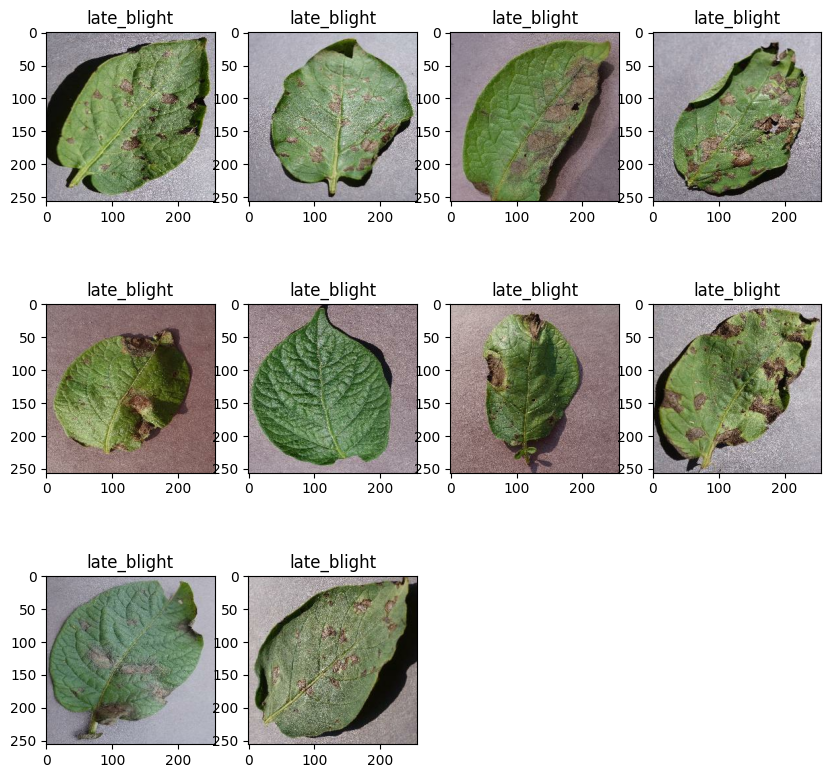

In [22]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
  # print(image_batch[0])
  for i in range(10):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[2]])
  # print(label_batch.numpy())

In [21]:
class_names = dataset.class_names
class_names

['early_blight', 'healthy', 'late_blight']

In [23]:
#train and test(validation + test)
train_size = 0.8
len(dataset)*train_size



54.400000000000006

In [24]:
train_data = dataset.take(54)

len(train_data)

54

In [25]:
test_data = dataset.skip(54)
len(test_data)

14

In [26]:
val_data = test_data.take(int(len(test_data)*0.5))

len(val_data)

7

In [27]:
def get_dataset_partition(ds, train_split = 0.8, val_split = 0.1, shuffle = True,shuffle_size = 10000, test_split = 0.1):

  if shuffle:
    ds = ds.shuffle(shuffle_size, seed=12)

  ds_size = len(ds)

  train_size = int(ds_size*train_split)
  val_size = int(ds_size*val_split)

  train_ds = ds.take(train_size)

  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)


  return train_ds, test_ds, val_ds

In [28]:
train_ds , test_ds, val_ds = get_dataset_partition(dataset)

In [29]:
len(train_ds)

54

In [30]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [31]:
resize_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(256,256),
    layers.experimental.preprocessing.Rescaling(1.0/255.0)
])

In [32]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [33]:
model = models.Sequential([
    resize_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu',input_shape=(32,256,256,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(3,activation='softmax' )

])
model.build((32,256,256,3))

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [35]:
from keras.api._v2.keras import metrics
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [36]:
history = model.fit(
    train_ds,
    epochs=50,
    batch_size=32,
    verbose = 1,
    validation_data = val_ds,
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


54/54 [==============================] - 23s 119ms/step - loss: 0.8893 - accuracy: 0.5336 - val_loss: 0.7294 - val_accuracy: 0.7344
Epoch 2/50
54/54 [==============================] - 3s 59ms/step - loss: 0.5592 - accuracy: 0.7517 - val_loss: 0.5266 - val_accuracy: 0.7812
Epoch 3/50
54/54 [==============================] - 3s 58ms/step - loss: 0.4216 - accuracy: 0.8316 - val_loss: 0.2449 - val_accuracy: 0.9010
Epoch 4/50
54/54 [==============================] - 3s 59ms/step - loss: 0.3889 - accuracy: 0.8495 - val_loss: 0.4024 - val_accuracy: 0.8229
Epoch 5/50
54/54 [==============================] - 3s 59ms/step - loss: 0.2170 - accuracy: 0.9207 - val_loss: 0.2541 - val_accuracy: 0.8906
Epoch 6/50
54/54 [==============================] - 3s 58ms/step - loss: 0.1464 - accuracy: 0.9421 - val_loss: 0.1480 - val_accuracy: 0.9323
Epoch 7/50
54/54 [==============================] - 3s 61ms/step - loss: 0.1456 - accuracy: 0.9531 - val_loss: 0.1611 - val_accuracy: 0.9271
Epoch 8/50
54/54 [====

In [37]:
model.evaluate(test_ds)

8/8 [==============================] - 3s 27ms/step - loss: 0.0197 - accuracy: 0.9922


[0.01973268948495388, 0.9921875]

In [38]:
history

In [39]:
history.params


{'verbose': 1, 'epochs': 50, 'steps': 54}

In [40]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [41]:
history.history['accuracy']

[0.5335648059844971,
 0.7517361044883728,
 0.8315972089767456,
 0.8495370149612427,
 0.9207175970077515,
 0.9421296119689941,
 0.953125,
 0.9380787014961243,
 0.9519675970077515,
 0.9641203880310059,
 0.9693287014961243,
 0.9646990895271301,
 0.9612268805503845,
 0.9693287014961243,
 0.9762731194496155,
 0.9791666865348816,
 0.9710648059844971,
 0.9635416865348816,
 0.9681712985038757,
 0.984375,
 0.9803240895271301,
 0.9797453880310059,
 0.9756944179534912,
 0.9866898059844971,
 0.9803240895271301,
 0.9890046119689941,
 0.9918981194496155,
 0.9681712985038757,
 0.9849537014961243,
 0.9675925970077515,
 0.9837962985038757,
 0.9878472089767456,
 0.9693287014961243,
 0.953125,
 0.9288194179534912,
 0.9832175970077515,
 0.9716435074806213,
 0.9837962985038757,
 0.9866898059844971,
 0.9918981194496155,
 0.9936342835426331,
 0.9427083134651184,
 0.9733796119689941,
 0.9918981194496155,
 0.9791666865348816,
 0.9907407164573669,
 0.9907407164573669,
 0.9936342835426331,
 0.9953703880310059,
 

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'train Val Accuracy')

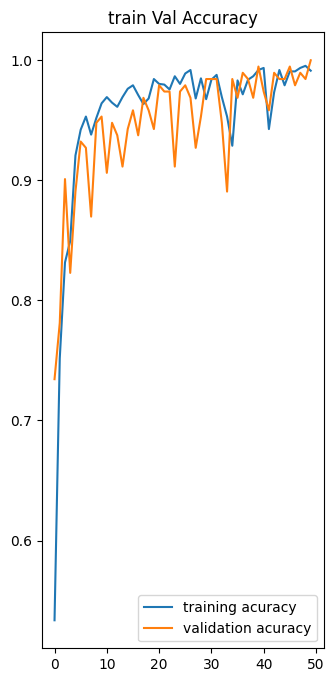

In [44]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(50),acc, label= "training acuracy")
plt.plot(range(50),val_acc, label= "validation acuracy")
plt.legend(loc='lower right')
plt.title("train Val Accuracy")


In [45]:
import numpy as np

first image to predict
actual_label: early_blight
1/1 [==============================] - 0s 41ms/step
predicted label : early_blight


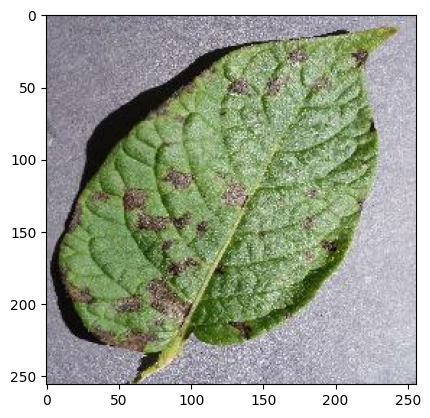

In [53]:
for image_batch, labels_batch in test_ds.take(1):

  first_image = image_batch[0].numpy().astype('uint8')
  first_label = labels_batch[0].numpy()

  print("first image to predict")
  plt.imshow(first_image)
  print("actual_label:",class_names[first_label])

  batch_predict = model.predict(image_batch)
  # print(np.argmax(batch_predict[0]))
  print('predicted label :', class_names[np.argmax(batch_predict[0])])


In [63]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    confidence = round( 100 * np.max(predictions))

    return predicted_class, confidence


1/1 [==============================] - 0s 22ms/step


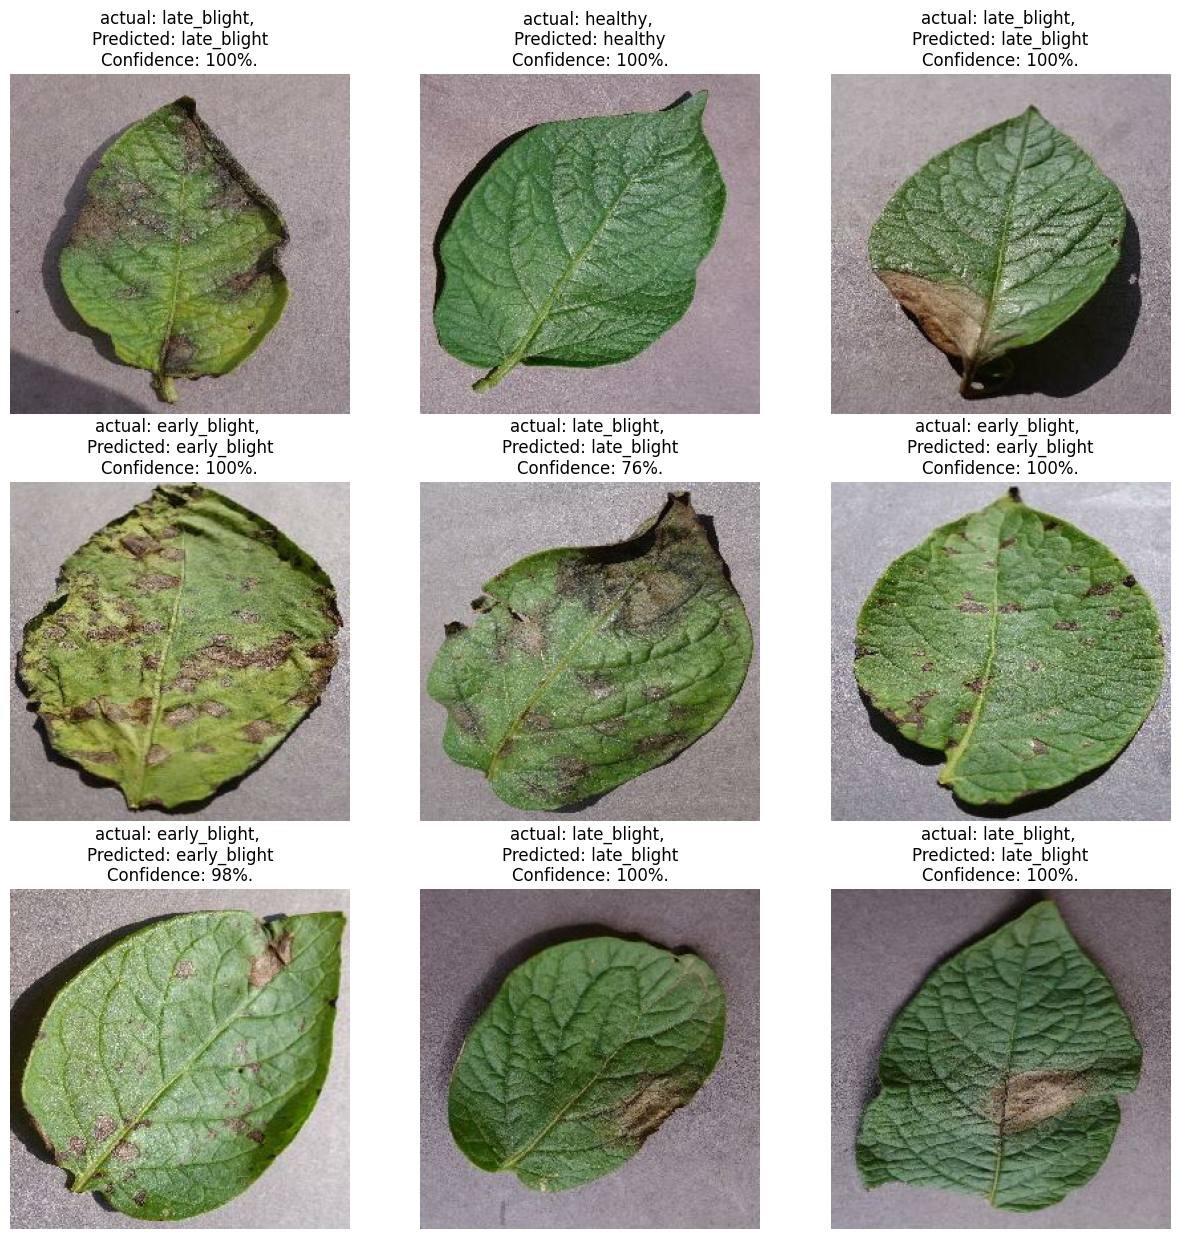

In [64]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))

    predicted_class , confidence = predict(model, images[i].numpy())
    actual_class = class_names[labels[i]]

    plt.title(f"actual: {actual_class}, \nPredicted: {predicted_class}\nConfidence: {confidence}%.")


    plt.axis("off")

In [67]:
import os
model_version=max([int(i) for i in os.listdir("/content/models") + [0]])+1
model.save(f"/content/models/{model_version}")

In [68]:
model.save("/content/models/potatoes.h5")

In [75]:
im ='/content/test_images/potato_image.jpg'

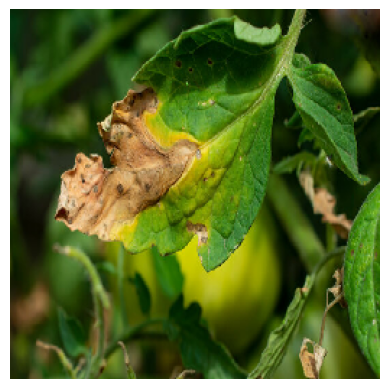

In [76]:
img = tf.keras.preprocessing.image.load_img(im, target_size=(256, 256))
plt.imshow(img)
plt.axis('off')
plt.show()


In [77]:
predicted_class, confidence = predict(model, img)

print(f"Predicted Class: {predicted_class}")
print(f"Confidence: {confidence}%")


1/1 [==============================] - 0s 126ms/step
Predicted Class: early_blight
Confidence: 100%
